## Pattern Separation Results

In [4]:
# import necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
OUTDATED_IGNORE=1
from pingouin import ttest
import pingouin as pg

In [13]:
# add figure path
figurepath = 'C:/Users/tuq67942/OneDrive - Temple University/Documents/Figures/'
# import dfs
PSagedf = pd.read_csv('csvs/PSoutputdf_exactage_1.csv')
PSdf = pd.read_csv('csvs/PSoutputdf_1.csv')
stackeddf = pd.read_csv('csvs/PS_cat_Year_1.csv')
anovadf = pd.read_csv('csvs/PS_cat_anova_Year_1.csv')
# import dfs intern
PSagedf = pd.read_csv('csvs/PSintern_1.csv')
PSdf = pd.read_csv('csvs/PSintern_1.csv')
stackeddf = pd.read_csv('csvs/PS_cat_intern_1.csv')
anovadf = pd.read_csv('csvs/PS_cat_anova_intern_1.csv')

### Removing 9 immediate-group participants who did o.g. version of the task broken up into two blocks on two separate days:

In [3]:
def exclude_fun(df,exlist):
    df = df[~df.Subject.isin(exlist)]
    return df

exclude = 1
if exclude == 1:
    excludedf = stackeddf[stackeddf['Same Day'] == False]
    exclude_subjs = excludedf['Subject']
    PSagedf = exclude_fun(PSagedf,exclude_subjs)
    PSdf = exclude_fun(PSdf,exclude_subjs)
    stackeddf = exclude_fun(stackeddf,exclude_subjs)
    anovadf = exclude_fun(anovadf,exclude_subjs)

# Age, and Sex breakdown of participants - and of those who did/did not experience the delay:

In [4]:
d = {'Among all participants:':stackeddf,
    'Among participants who experienced a delay between encoding and retrieval:':
     stackeddf[stackeddf['Delay']==True],
    'Among participants who did not experienced a delay between encoding and retrieval:':
     stackeddf[stackeddf['Delay']==False]}

for k,df in d.items():
    print(k)
    print('N = '+str(len(df)))
    print('Ages ranged from: '+str(np.min(df['Age']))+' - '+\
          str(np.max(df['Age']))+' years, Mean = '+\
          str(np.round(np.mean(df['Age']),2))+\
          ' +/- '+str(np.round(np.std(df['Age']),2)))
    print(df['Sex'].value_counts())


Among all participants:
N = 83
Ages ranged from: 4.0 - 7.9 years, Mean = 5.77 +/- 1.21
Girl    52
Boy     31
Name: Sex, dtype: int64
Among participants who experienced a delay between encoding and retrieval:
N = 50
Ages ranged from: 4.07 - 7.88 years, Mean = 5.63 +/- 1.19
Girl    33
Boy     17
Name: Sex, dtype: int64
Among participants who did not experienced a delay between encoding and retrieval:
N = 33
Ages ranged from: 4.0 - 7.9 years, Mean = 5.97 +/- 1.21
Girl    19
Boy     14
Name: Sex, dtype: int64


C:\Users\tuq67942\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


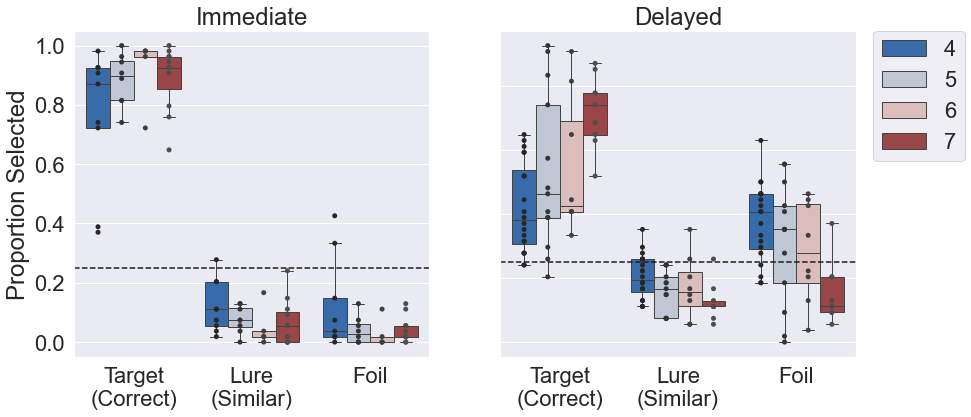

In [5]:
order = ['Target\n(Correct)','Lure\n(Similar)','Foil']
delaylabs = ['Immediate','Delayed']
orderage = [4,5,6,7]

sns.set(font_scale=2)
fig, ax = plt.subplots(1,2,figsize=(14, 6))
for i,delay in enumerate([False,True]):
    tmp = PSdf[PSdf['Delay']==delay]
    tmp = tmp.copy()
    tmp['Selection'] = tmp['Selection'].map({'Target': 'Target\n(Correct)', 'Lure': 'Lure\n(Similar)', 'Foil':'Foil'})
    sns.boxplot(data=tmp, x="Selection", y="Proportion Selected", hue="Age", palette="vlag",order=order, showfliers = False, ax = ax[i], legend=delay)
    sns.stripplot(data=tmp, x="Selection", y="Proportion Selected", hue="Age", dodge=True,palette='dark:.3',order=order, jitter=False,legend=False, ax = ax[i])
    ax[i].set(xlabel=None)
    ax[i].axhline(y=0.25, color='k', linestyle='--')
    ax[i].set_title(delaylabs[i])
ax[i].set(yticklabels=[])
ax[i].set(ylabel=None)

handles, labels = ax[i].get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


### Participants with 1 week delay are <i>clearly</i> off cieling, but is it significant?
### <b>Yes!</b>: Delay makes a significant difference in accuracy!

In [6]:
for sel in ['Target','Lure','Foil']:
    print(sel)
    display(ttest(
        stackeddf[stackeddf['Delay']==True][sel],
        stackeddf[stackeddf['Delay']==False][sel]))


Target


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.40595,79.497572,two-sided,1.348737e-12,"[-0.42, -0.26]",1.780404,4.783e+09,1.0


Lure


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.452428,69.34197,two-sided,7.174129e-07,"[0.06, 0.13]",1.219253,2.471e+04,0.999676


Foil


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,8.744811,79.906514,two-sided,2.812643e-13,"[0.19, 0.3]",1.76917,2.082e+10,1.0


In [7]:
ttest(stackeddf[(stackeddf['Sex']=='Girl')&(stackeddf['Delay']==True)]['Target'],
      stackeddf[(stackeddf['Sex']=='Boy')&(stackeddf['Delay']==True)]['Target'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.047354,30.694367,two-sided,0.049265,"[0.0, 0.25]",0.623737,1.552,0.534863


## Question from Nora/Zoe December 2023:
### Is this difference significant in all age groups (4, 5, 6, 7 y.o.'s)?

In [8]:
ages = [4,5,6,7,8]
for i in range(len(ages)-1):
    tmpdf = stackeddf[stackeddf['Age'].between(ages[i], ages[i+1])]
    print('age = '+str(ages[i]))
    display(ttest(tmpdf[tmpdf['Delay']==True]['Target'],tmpdf[tmpdf['Delay']==False]['Target']))

age = 4


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.098475,10.741588,two-sided,0.001853,"[-0.53, -0.16]",1.979755,71.707,0.997369


age = 5


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.725901,16.254946,two-sided,0.000219,"[-0.52, -0.2]",1.747366,141.269,0.957783


age = 6


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.133199,10.859619,two-sided,0.001709,"[-0.58, -0.18]",2.046283,18.995,0.903622


age = 7


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.385898,17.033239,two-sided,0.003505,"[-0.28, -0.06]",1.526027,11.842,0.894221


In [9]:
import statsmodels.formula.api as sm2

result = sm2.ols(formula='Target~Delay+Age+Age*Delay',data=stackeddf).fit()
print(result.summary()) #no interaction!

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     36.19
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           8.05e-15
Time:                        13:18:32   Log-Likelihood:                 33.327
No. Observations:                  83   AIC:                            -58.65
Df Residuals:                      79   BIC:                            -48.98
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5711      0.14

### Are 4-year-olds in the delay condition at chance?

In [10]:
tmpdf = stackeddf[stackeddf['Age'].between(4, 5)]
display(ttest(tmpdf[tmpdf['Delay']==True]['Target'],0.25))
print("4 year olds' performance is "+
      str(np.round(np.mean(tmpdf[tmpdf['Delay']==True]['Target']),2))+
     "+/-"+
     str(np.round(np.std(tmpdf[tmpdf['Delay']==True]['Target']),2)))

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.3363,19,two-sided,0.000038,"[0.35, 0.48]",1.193233,665.512,0.999004


4 year olds' performance is 0.42+/-0.14


# Let's just looks at those kids who had the delay going forward...

In [11]:
PSagedftmp1 = PSagedf[PSagedf['Delay']==True]
stackeddftmp1 = stackeddf[stackeddf['Delay']==True]

### plot correlation between age and Target/Lure/Foil proportion 

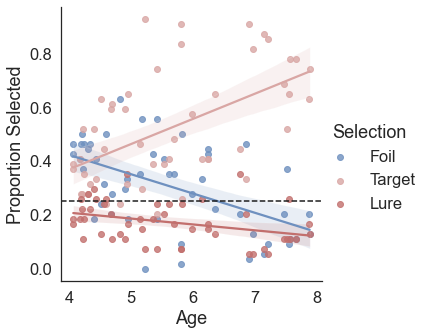

In [12]:
sns.set_theme(style="white",font_scale=1.5, palette=['#6e90bf',  '#d9a6a4', '#c26f6d'])
g = sns.lmplot(data=PSagedftmp1,x="Age", y="Proportion Selected", hue="Selection")
plt.axhline(y=0.25, color='k', linestyle='--')
g.savefig(figurepath+'PS_corr_Target_Lure_Foil.png', bbox_inches='tight', dpi=100)

### Correlation between age and proportion selected of Foil, Target, and Lure:

In [13]:
PSkey = {-1:'Foil',1:'Target',0:'Lure'}
statlist = []
for selection in PSkey.values():
	tmpdf = PSagedftmp1[PSagedftmp1['Selection'] == selection]
	res = stats.pearsonr(tmpdf['Age'],tmpdf['Proportion Selected'])
	statlist.append({'Selection':selection, 'Age/Prop r':res[0], 'Age/Prop p':res[1]})
statdf=pd.DataFrame(statlist)
display(statdf)

,Selection,Age/Prop r,Age/Prop p
0,Foil,-0.532835,0.000068
1,Target,0.539908,0.000052
2,Lure,-0.346888,0.013587


In [36]:
result = sm2.ols(formula='Age~Foil+Target+Lure+Foil*Lure',data=stackeddftmp1).fit()
print(result.summary()) #no interaction!

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     6.789
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           0.000694
Time:                        13:26:37   Log-Likelihood:                -70.428
No. Observations:                  50   AIC:                             148.9
Df Residuals:                      46   BIC:                             156.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8809      1.172      4.166      0.0

### Is the relationship between Lures and age significantly different from the relationship between foils and age? <b>No!</b>
### <i>Code from chatGPT4!!</i>

In [15]:
import numpy as np
from scipy.stats import t

def fisher_z_transform(r):
    return 0.5 * np.log((1 + r) / (1 - r))

def williams_test(r1, r2, r12, n):
    """
    Williams' Test for dependent correlations.
    
    Parameters:
    r1: First correlation coefficient.
    r2: Second correlation coefficient.
    r12: Correlation coefficient between the two variables of interest.
    n: Sample size.
    
    Returns:
    t_value: Test statistic.
    p_value: Two-tailed p-value.
    """
    
    z1 = fisher_z_transform(r1)
    z2 = fisher_z_transform(r2)
    
    numerator = z1 - z2
    denominator = np.sqrt((1 / (n - 3)) * (2 * (1 - r1) / (1 + r1) + 2 * (1 - r2) / (1 + r2) - 2 * (1 - r12)))
    
    t_value = numerator / denominator
    df = n - 3  # Degrees of freedom
    p_value = (1 - t.cdf(abs(t_value), df)) * 2  # Two-tailed p-value
    
    return t_value, p_value

for pair in [['Foil','Lure'],['Target','Lure'],['Target','Foil']]:
    t_value, p_value = williams_test(statdf[statdf.Selection==pair[0]]['Age/Prop r'].iloc[0], 
                  statdf[statdf.Selection==pair[1]]['Age/Prop r'].iloc[0], 
                  stats.pearsonr(stackeddftmp1[pair[0]],stackeddftmp1[pair[1]])[0], 
                 len(stackeddftmp1))

    print("Interaction between "+pair[0]+"-selection and "+pair[1]+"-selection:")
    print(f"t-value: {t_value:.4f}")
    print(f"p-value: {p_value:.4f}")

Interaction between Foil-selection and Lure-selection:
t-value: -0.5131
p-value: 0.6103
Interaction between Target-selection and Lure-selection:
t-value: 5.8841
p-value: 0.0000
Interaction between Target-selection and Foil-selection:
t-value: 4.5451
p-value: 0.0000


### Investigating potential differences between the selection of correct objects, locations, and animals by age:

,Selection,Age/Prop r,Age/Prop p
0,object,0.500214,0.000216
1,location,0.405393,0.003494
2,animal,0.576781,0.000012


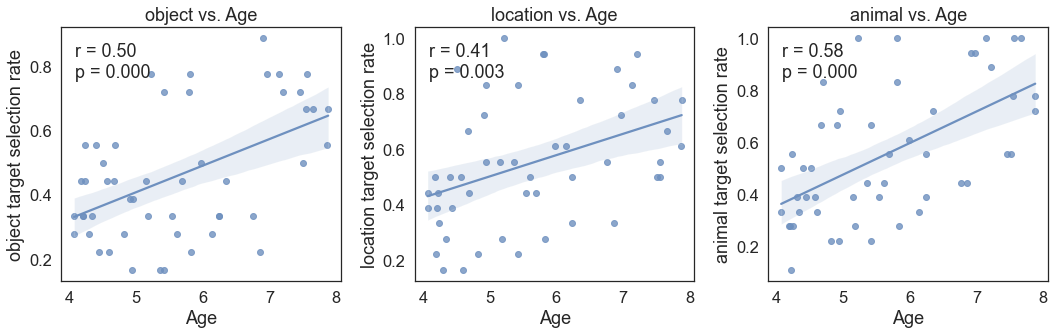

Target


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Item,2,98,11.146079,0.000043,0.035232,0.930155


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Item,animal,location,True,True,0.090003,49.0,two-sided,0.928652,1.000000,bonf,0.154,0.009192
1,Item,animal,object,True,True,4.765979,49.0,two-sided,0.000017,0.000052,bonf,1160.227,0.402869
2,Item,location,object,True,True,4.000404,49.0,two-sided,0.000213,0.000640,bonf,114.961,0.418477


Lure


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Item,2,98,2.655905,0.075289,0.026367,0.992279


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Item,animal,location,True,True,0.805446,49.0,two-sided,0.424454,1.000000,bonf,0.209,0.144361
1,Item,animal,object,True,True,-1.483534,49.0,two-sided,0.144337,0.433010,bonf,0.429,-0.234479
2,Item,location,object,True,True,-2.310337,49.0,two-sided,0.025122,0.075365,bonf,1.721,-0.415028


Foil


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Item,2,98,6.135159,0.003087,0.023607,0.915505


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Item,animal,location,True,True,-0.807366,49.0,two-sided,0.423358,1.000000,bonf,0.209,-0.095527
1,Item,animal,object,True,True,-3.532496,49.0,two-sided,0.000908,0.002725,bonf,31.043,-0.367784
2,Item,location,object,True,True,-2.782627,49.0,two-sided,0.007636,0.022909,bonf,4.741,-0.266590


In [16]:
statlistola = []
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i,selection in enumerate(['object','location','animal']):
	res = stats.pearsonr(stackeddftmp1['Age'],stackeddftmp1[selection+' target selection rate'])
	statlistola.append({'Selection':selection, 'Age/Prop r':res[0], 'Age/Prop p':res[1]})
	sns.regplot(data=stackeddftmp1, x='Age', y=selection+' target selection rate', ax=axes[i]).set_title(selection+' vs. Age')
	axes[i].text(0.05, 0.8, f'r = {res[0]:.2f}\np = {res[1]:.3f}', transform=axes[i].transAxes)
statdfola=pd.DataFrame(statlistola)
display(statdfola)

plt.tight_layout()
plt.show()
 
tmp = anovadf[anovadf['Delay']==True]
for sel in ['Target','Lure','Foil']:
    print(sel)
    res = pg.rm_anova(dv=sel,within='Item',subject='Subject',
                  data=tmp)
    post_hocs = pg.pairwise_tests(dv=sel,within='Item',
                              subject='Subject',padjust='bonf',
                              data=tmp)
    display(res)
    display(post_hocs)

### Are any of these correlation value significantly different from one another? <b>No!</b>

In [17]:
pairs = [['object','location'],['object','animal'],['animal','location']]
for pair in pairs:
    t_value, p_value = williams_test(statdfola[statdfola.Selection==pair[0]]['Age/Prop r'].iloc[0], 
                  statdfola[statdfola.Selection==pair[1]]['Age/Prop r'].iloc[0], 
                  stats.pearsonr(stackeddftmp1[pair[0]+' target selection rate'],
                                 stackeddftmp1[pair[1]+' target selection rate'])[0], 
                 len(stackeddftmp1))
    print(pair)
    print(f"t-value: {t_value:.4f}")
    print(f"p-value: {p_value:.4f}")

['object', 'location']
t-value: 0.8321
p-value: 0.4095
['object', 'animal']
t-value: -0.7866
p-value: 0.4355
['animal', 'location']
t-value: 1.6805
p-value: 0.0995


### Does length of delay effect accuracy?

In [52]:
delaydf = pd.read_csv('csvs/Delay_Days_1.csv')
PSkey = {-1:'Foil',1:'Target',0:'Lure'}
statlist = []
for selection in PSkey.values():
	tmpdf = PSagedftmp1[PSagedftmp1['Selection'] == selection]
	tmpdf = tmpdf.merge(delaydf, on=['Subject'],how='left', indicator=True)
	res = stats.pearsonr(tmpdf['Delay Days'],tmpdf['Proportion Selected'])
	statlist.append({'Selection':selection, 'Age/Prop r':res[0], 'Age/Prop p':res[1]})
statdf=pd.DataFrame(statlist)
display(statdf)


,Selection,Age/Prop r,Age/Prop p
0,Foil,0.182443,0.204759
1,Target,-0.262134,0.065917
2,Lure,0.331137,0.018826


# Here: Analyzing only kids WITHOUT the delay

In [18]:
PSagedftmp0 = PSagedf[PSagedf['Delay']==False]
stackeddftmp0 = stackeddf[stackeddf['Delay']==False]

## Is <i>immediate</i> group at ceiling?

In [19]:
display(ttest(stackeddftmp0['Target'],1))

for age in [4,5,6,7]:
        print('Age = '+str(age))
        tmp = stackeddftmp0[stackeddftmp0['Age'].between(age, age+1)]
        display(ttest(tmp['Target'],1.0))
        print(str(age)+" year olds' accuracy is "+
              str(np.round(np.mean(tmp['Target']),2))+
             "+/-"+
             str(np.round(np.std(tmp['Target']),2)))

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.162926,32,two-sided,0.000012,"[0.8, 0.91]",0.89875,1711.186,0.998828


Age = 4


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.117507,8,two-sided,0.014282,"[0.58, 0.94]",1.039169,4.797,0.779258


4 year olds' accuracy is 0.76+/-0.22
Age = 5


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.72678,7,two-sided,0.00739,"[0.81, 0.96]",1.317616,8.287,0.889603


5 year olds' accuracy is 0.88+/-0.08
Age = 6


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.450953,4,two-sided,0.220415,"[0.78, 1.07]",0.648886,0.798,0.202869


6 year olds' accuracy is 0.93+/-0.1
Age = 7


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.244929,10,two-sided,0.008796,"[0.82, 0.97]",0.978383,6.714,0.831973


7 year olds' accuracy is 0.89+/-0.1


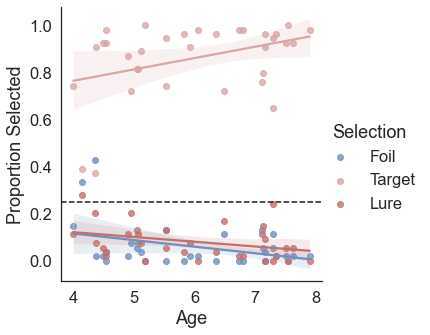

In [20]:
sns.set_theme(style="white",font_scale=1.5, palette=['#6e90bf',  '#d9a6a4', '#c26f6d'])
g = sns.lmplot(data=PSagedftmp0,x="Age", y="Proportion Selected", hue="Selection")
plt.axhline(y=0.25, color='k', linestyle='--')

In [21]:
PSkey = {-1:'Foil',1:'Target',0:'Lure'}
statlist = []
for selection in PSkey.values():
	tmpdf = PSagedftmp0[PSagedftmp0['Selection'] == selection]
	res = stats.pearsonr(tmpdf['Age'],tmpdf['Proportion Selected'])
	statlist.append({'Selection':selection, 'Age/Prop r':res[0], 'Age/Prop p':res[1]})
statdf=pd.DataFrame(statlist)
display(statdf)

,Selection,Age/Prop r,Age/Prop p
0,Foil,-0.365643,0.036390
1,Target,0.377381,0.030382
2,Lure,-0.333213,0.058105


In [22]:
result = sm2.ols(formula='Age~Foil+Target+Lure+Foil*Lure',data=stackeddftmp0).fit()
print(result.summary()) #no interaction!

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.628
Date:                Fri, 09 Feb 2024   Prob (F-statistic):              0.205
Time:                        13:18:34   Log-Likelihood:                -50.468
No. Observations:                  33   AIC:                             108.9
Df Residuals:                      29   BIC:                             114.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7015      2.114      1.751      0.0

In [23]:
for pair in [['Foil','Lure'],['Target','Lure'],['Target','Foil']]:
    t_value, p_value = williams_test(statdf[statdf.Selection==pair[0]]['Age/Prop r'].iloc[0], 
                  statdf[statdf.Selection==pair[1]]['Age/Prop r'].iloc[0], 
                  stats.pearsonr(stackeddftmp0[pair[0]],stackeddftmp0[pair[1]])[0], 
                 len(stackeddftmp0))

    print("Interaction between "+pair[0]+"-selection and "+pair[1]+"-selection:")
    print(f"t-value: {t_value:.4f}")
    print(f"p-value: {p_value:.4f}")

Interaction between Foil-selection and Lure-selection:
t-value: -0.0726
p-value: 0.9426
Interaction between Target-selection and Lure-selection:
t-value: 3.9217
p-value: 0.0005
Interaction between Target-selection and Foil-selection:
t-value: 3.7221
p-value: 0.0008


,Selection,Age/Prop r,Age/Prop p
0,object,0.158609,0.377991
1,location,0.500052,0.003044
2,animal,0.341861,0.051506


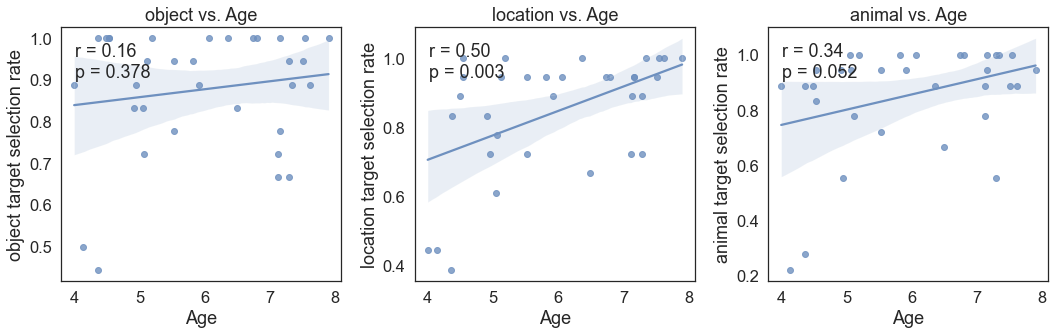

Target


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Item,2,64,1.033908,0.361477,0.00604,0.94583


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Item,animal,location,True,True,0.406838,32.0,two-sided,0.686835,1.000000,bonf,0.201,0.053742
1,Item,animal,object,True,True,-0.949228,32.0,two-sided,0.349619,1.000000,bonf,0.282,-0.123945
2,Item,location,object,True,True,-1.592343,32.0,two-sided,0.121139,0.363417,bonf,0.582,-0.196789


Lure


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Item,2,64,0.442396,0.644445,0.004775,0.870659


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Item,animal,location,True,True,-0.835404,32.0,two-sided,0.409685,1.0,bonf,0.257,-0.157661
1,Item,animal,object,True,True,-0.571429,32.0,two-sided,0.571701,1.0,bonf,0.217,-0.104499
2,Item,location,object,True,True,0.392232,32.0,two-sided,0.697487,1.0,bonf,0.2,0.057859


Foil


,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,Item,2,64,2.746367,0.07173,0.017895,0.976973


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Item,animal,location,True,True,0.320943,32.0,two-sided,0.750340,1.000000,bonf,0.195,0.043381
1,Item,animal,object,True,True,2.301974,32.0,two-sided,0.027994,0.083983,bonf,1.845,0.303111
2,Item,location,object,True,True,1.879915,32.0,two-sided,0.069250,0.207751,bonf,0.892,0.275162


In [24]:
statlistola = []
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i,selection in enumerate(['object','location','animal']):
	res = stats.pearsonr(stackeddftmp0['Age'],stackeddftmp0[selection+' target selection rate'])
	statlistola.append({'Selection':selection, 'Age/Prop r':res[0], 'Age/Prop p':res[1]})
	sns.regplot(data=stackeddftmp0, x='Age', y=selection+' target selection rate', ax=axes[i]).set_title(selection+' vs. Age')
	axes[i].text(0.05, 0.8, f'r = {res[0]:.2f}\np = {res[1]:.3f}', transform=axes[i].transAxes)
statdfola=pd.DataFrame(statlistola)
display(statdfola)

plt.tight_layout()
plt.show()

tmp = anovadf[anovadf['Delay']==False]
for sel in ['Target','Lure','Foil']:
    print(sel)
    res = pg.rm_anova(dv=sel,within='Item',subject='Subject',
                  data=tmp)
    post_hocs = pg.pairwise_tests(dv=sel,within='Item',
                              subject='Subject',padjust='bonf',
                              data=tmp)
    display(res)
    display(post_hocs)

In [25]:
pairs = [['object','location'],['object','animal'],['animal','location']]
for pair in pairs:
    t_value, p_value = williams_test(statdfola[statdfola.Selection==pair[0]]['Age/Prop r'].iloc[0], 
                  statdfola[statdfola.Selection==pair[1]]['Age/Prop r'].iloc[0], 
                  stats.pearsonr(stackeddftmp0[pair[0]+' target selection rate'],
                                 stackeddftmp0[pair[1]+' target selection rate'])[0], 
                 len(stackeddftmp0))
    print(pair)
    print(f"t-value: {t_value:.4f}")
    print(f"p-value: {p_value:.4f}")

['object', 'location']
t-value: -1.6750
p-value: 0.1043
['object', 'animal']
t-value: -0.7759
p-value: 0.4439
['animal', 'location']
t-value: -1.0225
p-value: 0.3147


## Nora question: Did the immediate group "learn to learn" - in other words is there a performance difference between session 1 and session 2?

In [26]:
for sel in ['Target','Lure','Foil']:
    print(sel)
    display(ttest(stackeddftmp0[sel+' first'], stackeddftmp0[sel+' second'], paired=True))
    print('Mean '+sel+' rate in first half:')
    print(np.round(np.mean(stackeddftmp0[sel+' first']),2))
    print('+/-')
    print(np.round(np.std(stackeddftmp0[sel+' first']),2))
    print('Mean '+sel+' rate in second half:')
    print(np.round(np.mean(stackeddftmp0[sel+' second']),2))
    print('+/-')
    print(np.round(np.std(stackeddftmp0[sel+' second']),2))
    
print('There is no change in Target/Lure/Foil selection rate\n'+
'between first and second session')

Target


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.469545,32,two-sided,0.641864,"[-0.03, 0.04]",0.047927,0.206,0.058215


Mean Target rate in first half:
0.86
+/-
0.15
Mean Target rate in second half:
0.86
+/-
0.17
Lure


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.665129,32,two-sided,0.510734,"[-0.01, 0.03]",0.08408,0.229,0.07552


Mean Lure rate in first half:
0.08
+/-
0.09
Mean Lure rate in second half:
0.08
+/-
0.07
Foil


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.123291,32,two-sided,0.269671,"[-0.04, 0.01]",0.144606,0.332,0.127092


Mean Foil rate in first half:
0.05
+/-
0.08
Mean Foil rate in second half:
0.07
+/-
0.12
There is no change in Target/Lure/Foil selection rate
between first and second session


## New Results requested by Nora and Zoe (in December 2023):
### Is the relationship between age and target/lure/foil selection significantly different between delay and no-delay group?

### 1) Is there an interaction between age and delay and target/lure/foil selection?

In [27]:
for selection in PSkey.values():
    # Test for interaction:
    result = sm2.ols(formula=selection+' ~ Age + Delay + Age * Delay',
                     data=stackeddf).fit()    
    print(selection)
    print(result.summary()) 

Foil
                            OLS Regression Results                            
Dep. Variable:                   Foil   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     36.32
Date:                Fri, 09 Feb 2024   Prob (F-statistic):           7.43e-15
Time:                        13:18:35   Log-Likelihood:                 59.478
No. Observations:                  83   AIC:                            -111.0
Df Residuals:                      79   BIC:                            -101.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.2270     

### 2) 3 way interation: 'Proportion Selected' ~ Age + Delay + Selection (Foil or Lure) + Age X Delay X Selection (With Subject as grouping factor)

In [28]:
PSagedftmp = PSagedf.rename({'Proportion Selected':'PS'},axis=1)
PSagedftmp = PSagedftmp[~PSagedftmp.Selection.isin(["Target"])]
model = sm2.mixedlm("PS ~ Delay + Age + Selection + Delay*Age*Selection", PSagedftmp, groups=PSagedftmp["Subject"]) # Random Intercept
result = model.fit()
print(result.summary())

                    Mixed Linear Model Regression Results
Model:                    MixedLM         Dependent Variable:         PS      
No. Observations:         166             Method:                     REML    
No. Groups:               83              Scale:                      0.0060  
Min. group size:          2               Log-Likelihood:             131.4092
Max. group size:          2               Converged:                  Yes     
Mean group size:          2.0                                                 
------------------------------------------------------------------------------
                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------
Intercept                            0.227    0.087  2.597 0.009  0.056  0.398
Delay[T.True]                        0.482    0.111  4.351 0.000  0.265  0.700
Selection[T.Lure]                   -0.025    0.096 -0.260 0.795 -0.214  

C:\Users\tuq67942\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [56]:
for sel in ['Foil','Lure']:
    for age in [4,5,6,7]:
        print(sel,age)
        tmp = PSagedf[PSagedf.Selection.isin([sel])]
        tmp = tmp[tmp['Age'].between(age, age+1)]
        display(ttest(tmp[tmp['Delay']==False]['Proportion Selected'],
                     tmp[tmp['Delay']==True]['Proportion Selected']))
        

Foil 4


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.431661,12.519407,two-sided,0.00074,"[-0.39, -0.13]",1.963902,150.136,0.997043


Foil 5


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.989229,14.17606,two-sided,0.000191,"[-0.39, -0.16]",1.791899,231.74,0.965554


Foil 6


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.275439,8.894637,two-sided,0.00212,"[-0.39, -0.12]",1.979122,22.788,0.884217


Foil 7


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.19911,10.642883,two-sided,0.00881,"[-0.19, -0.03]",1.54263,8.674,0.900445


Lure 4


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.482756,12.454284,two-sided,0.028172,"[-0.15, -0.01]",1.103195,3.114,0.754793


Lure 5


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.338292,18.612396,two-sided,0.00353,"[-0.13, -0.03]",1.37376,11.339,0.82629


Lure 6


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.643212,10.849751,two-sided,0.0231,"[-0.23, -0.02]",1.37126,2.96,0.59208


Lure 7


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.959471,17.942295,two-sided,0.065781,"[-0.12, 0.0]",0.856626,1.426,0.438144


### None of the correlation values (age x accuracy correlation) are significantly different between delay and no-delay

In [29]:
# Code from chat GPT:
from scipy.stats import norm

# Function to transform Pearson r to Fisher Z
def r_to_z(r):
    return np.arctanh(r)

# Function to calculate standard error for Fisher Z
def standard_error(n):
    return 1/np.sqrt(n-3)

# Function to test the difference in correlation coefficients
def test_correlation_difference(r1, n1, r2, n2):
    z1 = r_to_z(r1)
    z2 = r_to_z(r2)
    se1 = standard_error(n1)
    se2 = standard_error(n2)

    # Calculate z-score for the difference
    z_diff = (z1 - z2) / np.sqrt(se1**2 + se2**2)
    p_value = 2 * (1 - norm.cdf(abs(z_diff)))

    return z_diff, p_value

for selection in PSkey.values():
	tmpdf = PSagedf[PSagedf['Selection'] == selection]
	tmpdf1 = tmpdf[tmpdf['Delay'] == False]
	res1 = stats.pearsonr(tmpdf1['Age'],tmpdf1['Proportion Selected'])[0]
	tmpdf2 = tmpdf[tmpdf['Delay'] == True]
	res2 = stats.pearsonr(tmpdf2['Age'],tmpdf2['Proportion Selected'])[0]
	z_diff, p_value = test_correlation_difference(res1, len(tmpdf1), res2, len(tmpdf2))
	print('Difference in correlations for: '+selection)
	print(f"Z-difference: {z_diff}, P-value: {p_value}")
    
tmpdf1 = stackeddf[stackeddf['Delay'] == False]
tmpdf2 = stackeddf[stackeddf['Delay'] == True]
for selection in ['object','location','animal']:
    res1 = stats.pearsonr(tmpdf1['Age'],tmpdf1[selection+' target selection rate'])[0]
    res2 = stats.pearsonr(tmpdf2['Age'],tmpdf2[selection+' target selection rate'])[0]
    z_diff, p_value = test_correlation_difference(res1, len(tmpdf1), res2, len(tmpdf2))
    print('Difference in correlations for: '+selection)
    print(f"Z-difference: {z_diff}, P-value: {p_value}")

Difference in correlations for: Foil
Z-difference: 0.9016797752358398, P-value: 0.3672269996645068
Difference in correlations for: Target
Z-difference: -0.8858990564032884, P-value: 0.3756719246548408
Difference in correlations for: Lure
Z-difference: 0.06617215969857682, P-value: 0.9472407615223204
Difference in correlations for: object
Z-difference: -1.66732126774987, P-value: 0.09545053988716234
Difference in correlations for: location
Z-difference: 0.5104642729654563, P-value: 0.6097262382128381
Difference in correlations for: animal
Z-difference: -1.2898718425931905, P-value: 0.19709515860533977


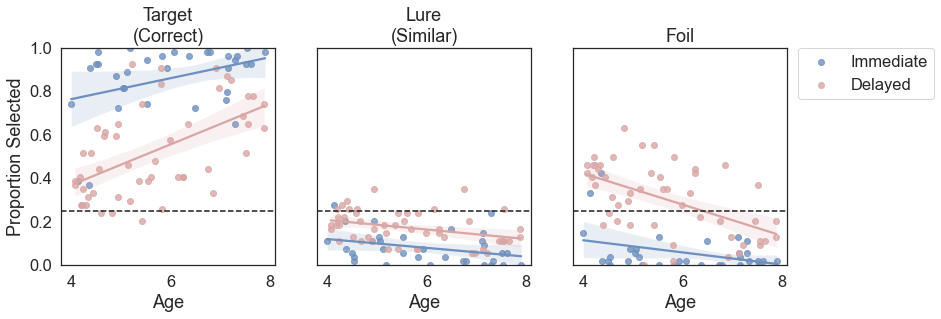

In [30]:
order = ['Target','Lure','Foil']
title = ['Target\n(Correct)', 'Lure\n(Similar)', 'Foil']
sns.set_theme(style="white",font_scale=1.5, palette=['#6e90bf',  '#d9a6a4', '#c26f6d'])
fig,ax=plt.subplots(1,3,figsize=(13, 4))
for i,selection in enumerate(order):
    tmp = PSagedf[PSagedf['Selection']==selection]
    sns.regplot(data=tmp[tmp['Delay']==False],x="Age", y="Proportion Selected",ax=ax[i],label='Immediate')
    sns.regplot(data=tmp[tmp['Delay']==True],x="Age", y="Proportion Selected",ax=ax[i],label='Delayed')
    ax[i].set_ylim([0,1])
    ax[i].axhline(y=0.25, color='k', linestyle='--')
    ax[i].set_title(title[i])
    if i>0:
        ax[i].set(yticklabels=[])
        ax[i].set(ylabel=None)
handles, labels = ax[i].get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
